In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

E:\Users\MichaelHopwood\miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
E:\Users\MichaelHopwood\miniconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
E:\Users\MichaelHopwood\miniconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [2]:
folder = 'data'
df = pd.read_excel(os.path.join(folder, '20211128 - Full DART Data (Model & Test).xlsx'), header=2)
df.head()

,Sample,Class,Sample Types,SRN,59.00498,72.00792,74.00967,75.00427,77.00585,77.00646,...,534.22864,545.23129,548.2292,564.22822,578.23102,589.23387,592.23132,608.23108,622.23371,636.23384
0,1,c1,Model,SRN00001_DART_NHM_1,0.0,0.0,0.0,0.00,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,c1,Model,SRN00001_DART_NHM_2,0.0,0.0,0.0,0.00,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,c1,Model,SRN00001_DART_NHM_3,0.0,0.0,0.0,0.00,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,c2,Model,SRN00002_DART_NHM_1,0.0,0.0,0.0,0.00,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,c2,Model,SRN00002_DART_NHM_2,0.0,0.0,0.0,5.83,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
labeled_df = df[df['Sample Types'] == 'Model']
recol = [(float('.'.join(col.split('.')[:2])) if isinstance(col, str) else col) for col in df.columns[4:]]
unique_classes = labeled_df['Class'].unique()

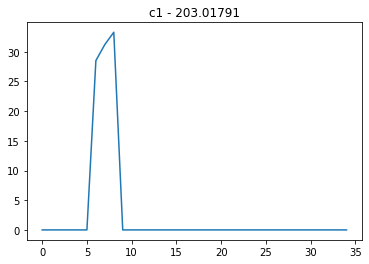

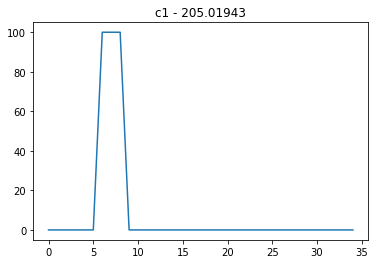

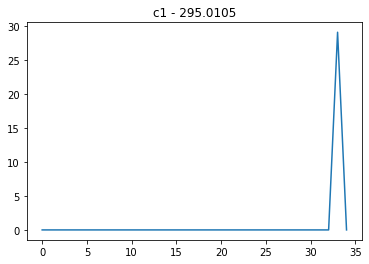

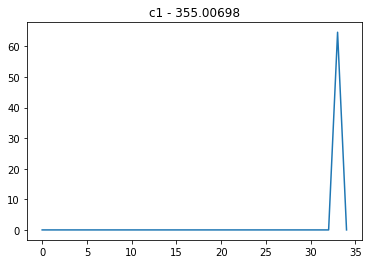

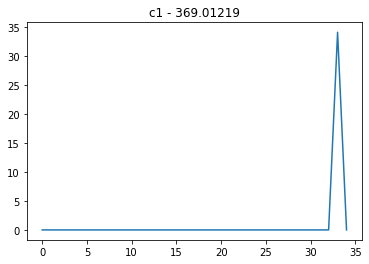

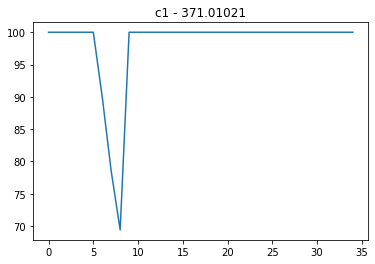

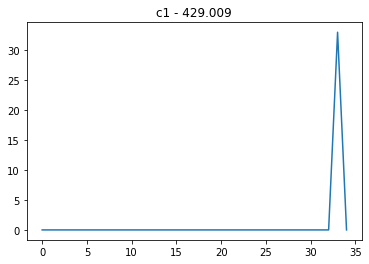

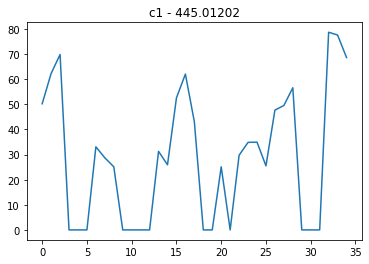

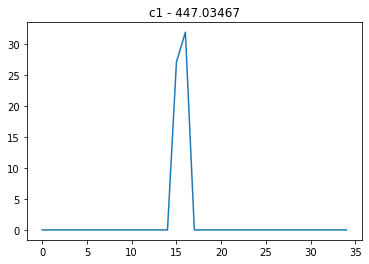

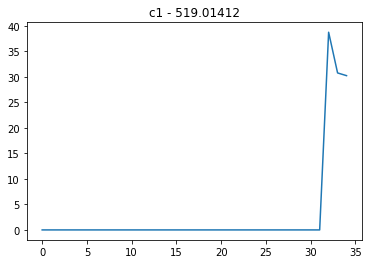

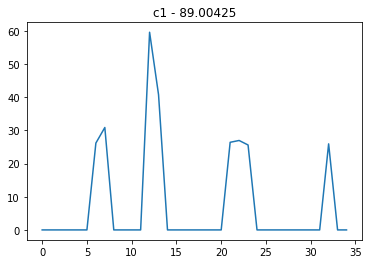

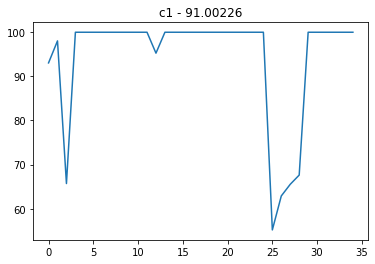

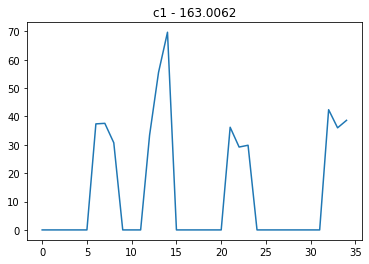

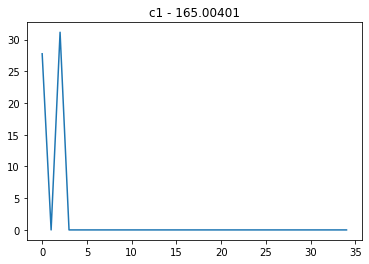

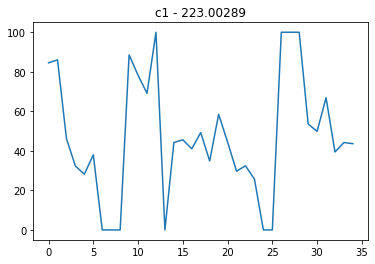

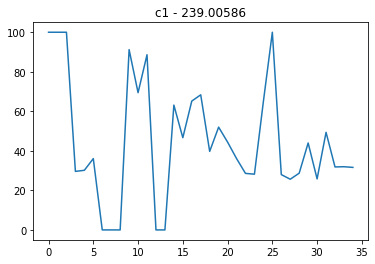

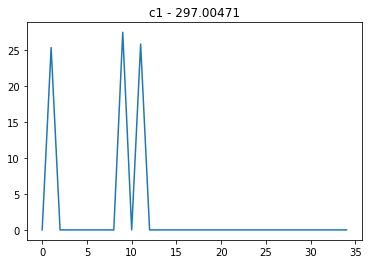

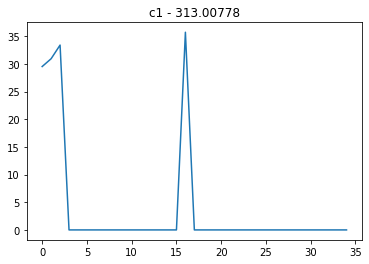

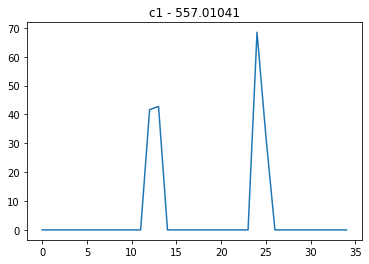

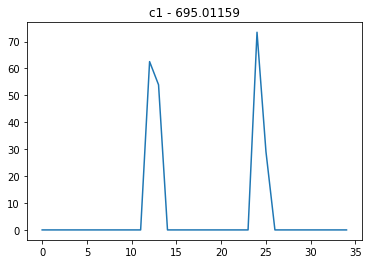

In [42]:
def extractor(labeled_df, unique_classes, recol, gt=25):

    #for label in unique_classes:
    label = unique_classes[0]
    df = labeled_df[labeled_df['Class'] == label]
    data = df[df.columns[4:]].values

    data[data<gt] = 0
    active_peaks_locs = (data > gt).any(axis=0)
    active_peaks = data[:, active_peaks_locs]
    active_recol = [r for r,b in zip(recol, active_peaks_locs) if b]
    for i in range(active_peaks.shape[1]):
        plt.plot(active_peaks[:,i])
        plt.title(f'{label} - {active_recol[i]}')
        plt.show()

extractor(labeled_df, unique_classes, recol)